In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import mpld3
%matplotlib inline

In [4]:
phot_table = ascii.read('ap_phot_pipeline_results/N2420_dt_20180802.csv')
src_star   = ascii.read('../g_starsNGC2420.csv')

In [6]:
mask = np.where(phot_table['Star1_Res'] != 0.0)
phot_table['Star1_Res'][mask]

8.08444236793
7.70595496755
8.02520158933
8.27214074403
7.84463733879
8.02046128572
10.6336166118
8.37482519475
8.05024880888
7.94895014996
8.02019391382


In [35]:
flux = []
for sname in phot_table.colnames[3::2]:
    mask = np.where(phot_table[sname] != 0.0)
    flux.append(np.nanmean(phot_table[sname][mask]))

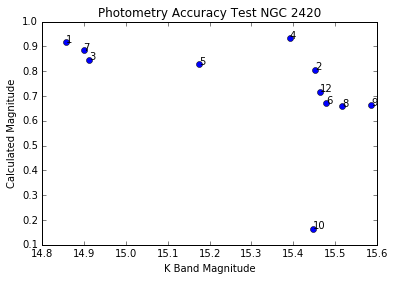

In [63]:
calc_mag = np.log10(flux)
k_mag    = src_star['K mag']

fig, ax = plt.subplots()
ax.plot(k_mag, calc_mag, 'o')
ax.set_xlabel('K Band Magnitude')
ax.set_ylabel('Calculated Magnitude')
ax.set_title('Photometry Accuracy Test NGC 2420')

labels = ['%i' % (i+1) for i in range(len(k_mag))]
for i, labels in enumerate(labels):
    ax.annotate(labels, (k_mag[i], calc_mag[i]))
plt.savefig('mag-mag plot.png')